<a href="https://colab.research.google.com/github/neha23nagaraj/Statistical-analysis-of-S-P-500-companies/blob/main/Final_Project_MA541.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MA 541 Course Project**
##**Statistical Analysis of S&P 500 Companies Using Financial Metrics**

### Neha Nagaraj (20029487), Ambrish Pathak (20030417), and Palak Parikh (20031842)

###Spring 2025 – Group 05

## 1. Data Acquisition
*The dataset chosen for this project is the “S&P 500 Companies with Financial Information”, and has been taken
from Kaggle:
https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information*

###1.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway, f
from scipy.stats import kruskal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


###1.2 Load Data

In [ ]:
# Load the dataset
file_path = "financials.csv"
df = pd.read_csv(file_path)

# View basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB
None
  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company      

##2 Data Description

###2.1 Understanding the dataset

In [ ]:
df.describe(include="all")  # Summary statistics
df.columns  # List all columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

### 2.2 Data Cleaning & Preprocessing

#### 2.1.1 Handling Missing Values

In [ ]:
print(df.isnull().sum())  # Count missing values per column
df.dropna(inplace=True)   # Remove rows with missing values

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


#### 2.1.2 Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

#### 2.1.3 Converting Data Types & Standardizing Formats

In [ ]:
df["Market Cap"] = df["Market Cap"].astype(str).str.replace("$", "").str.replace(",", "").astype(float)
df["Price/Earnings"] = pd.to_numeric(df["Price/Earnings"], errors='coerce')

## 3 Exploratory Data Analysis (EDA)

### 3.1 Summary Statistics

In [ ]:
print("Summary Statistics for Key Financial Indicators:")
numerical_cols = df.select_dtypes(include=np.number).columns
print(df[numerical_cols].describe())

Summary Statistics for Key Financial Indicators:
             Price  Price/Earnings  Dividend Yield  Earnings/Share  \
count   495.000000      495.000000      495.000000      495.000000   
mean    104.106505       24.654303        1.901477        3.815192   
std     135.372594       40.767081        1.541039        5.529133   
min       2.820000     -251.530000        0.000000      -24.620000   
25%      46.355000       15.350000        0.795585        1.525000   
50%      73.920000       19.450000        1.790190        2.890000   
75%     116.735000       25.770000        2.797169        5.120000   
max    1806.060000      520.150000       12.661196       44.090000   

       52 Week Low  52 Week High    Market Cap        EBITDA  Price/Sales  \
count   495.000000    495.000000  4.950000e+02  4.950000e+02   495.000000   
mean    122.985808     83.812053  4.937665e+10  3.576406e+09     3.953316   
std     156.480433    106.497350  9.069162e+10  6.880742e+09     3.485055   
min       6.

### 3.2 Distribution Analysis & Outlier Detection


Generating distribution plots for key indicators...


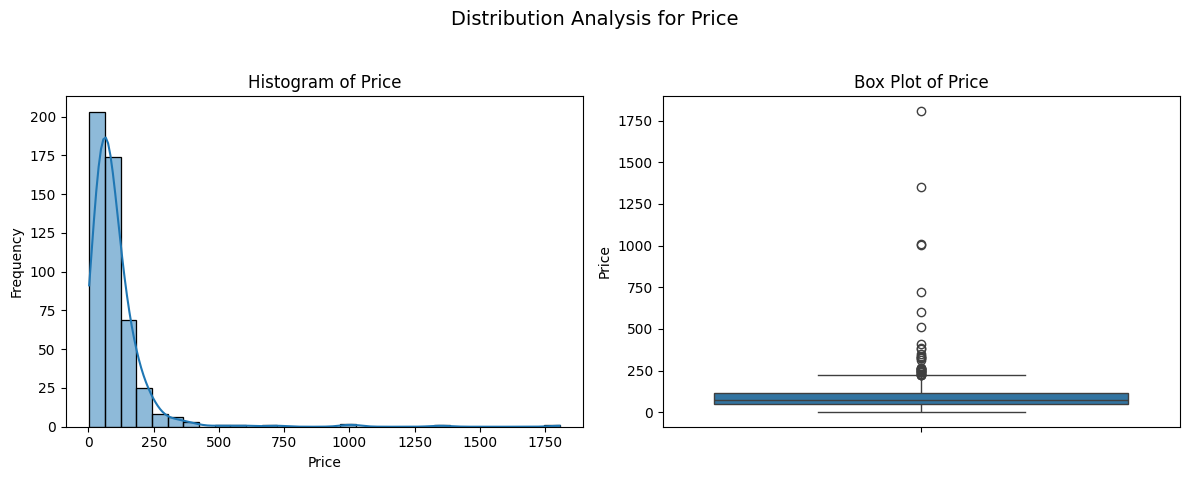

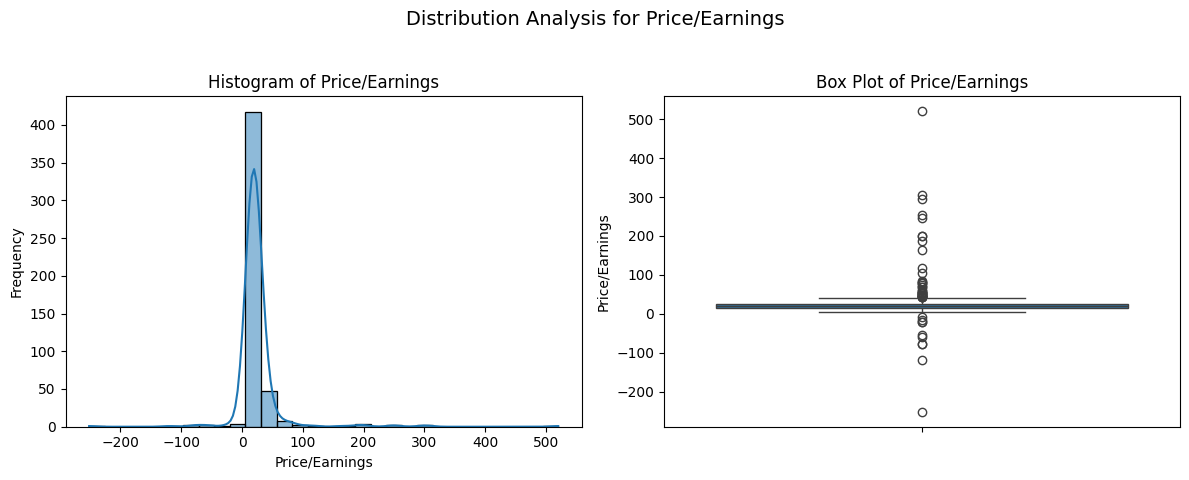

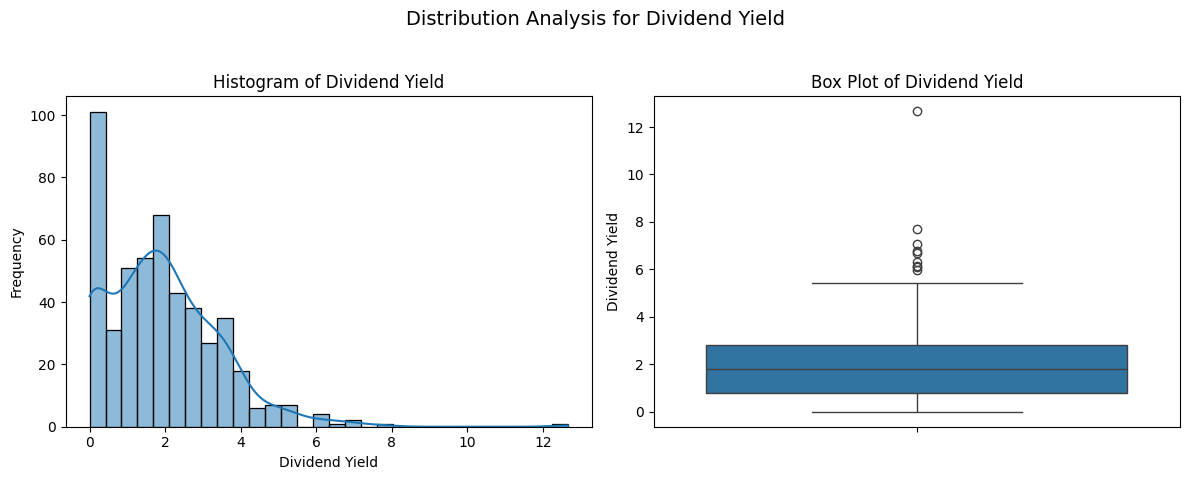

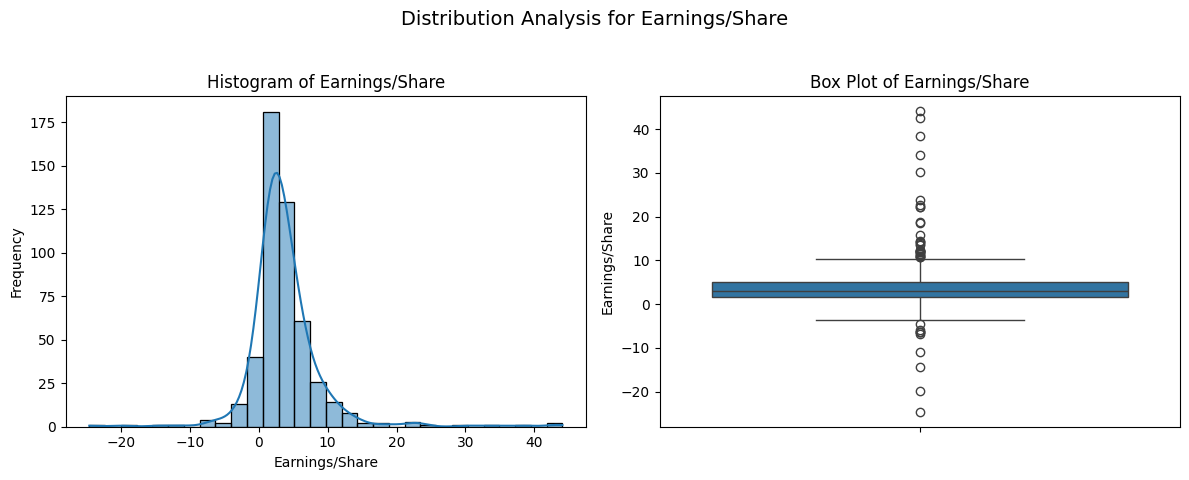

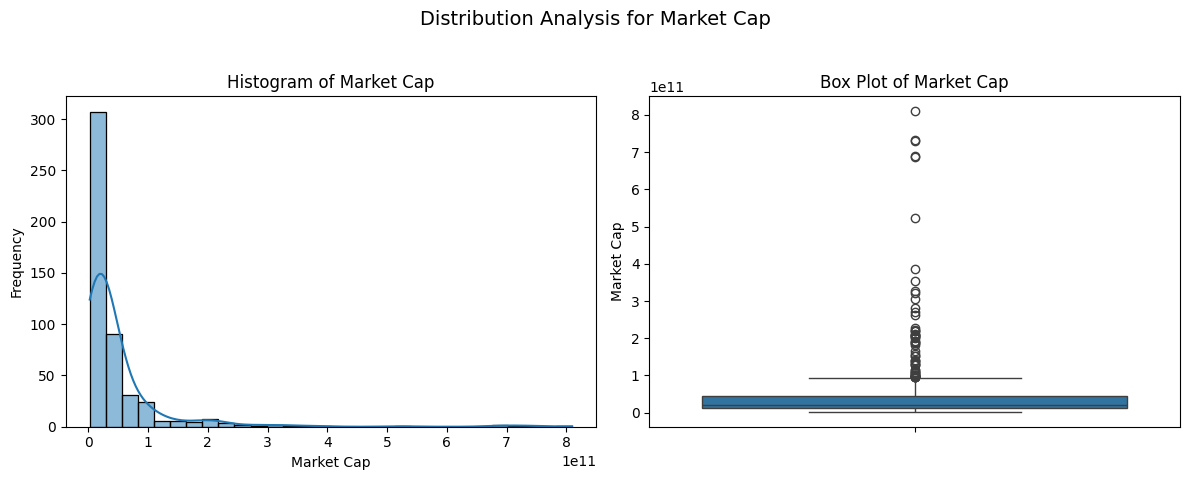

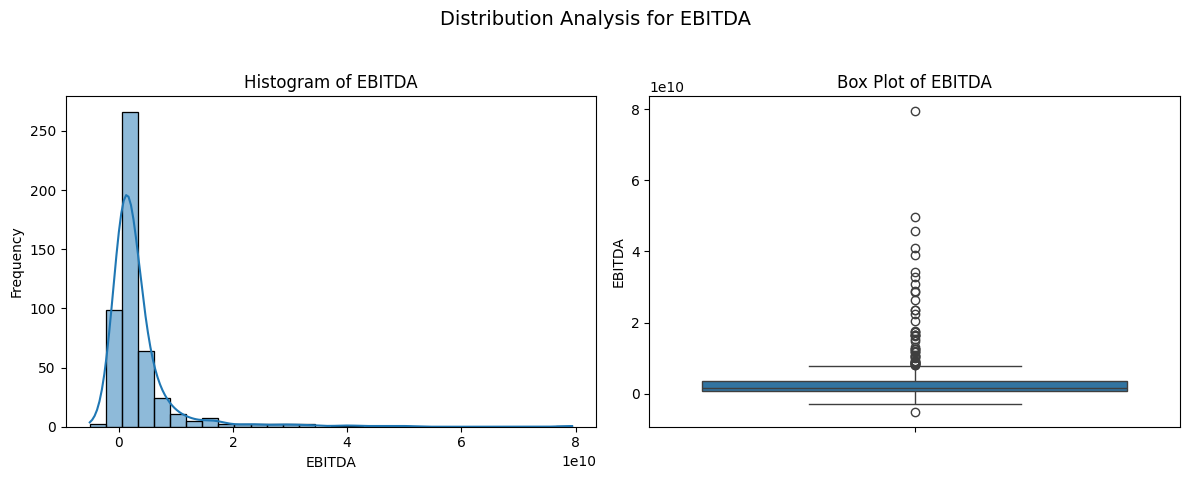

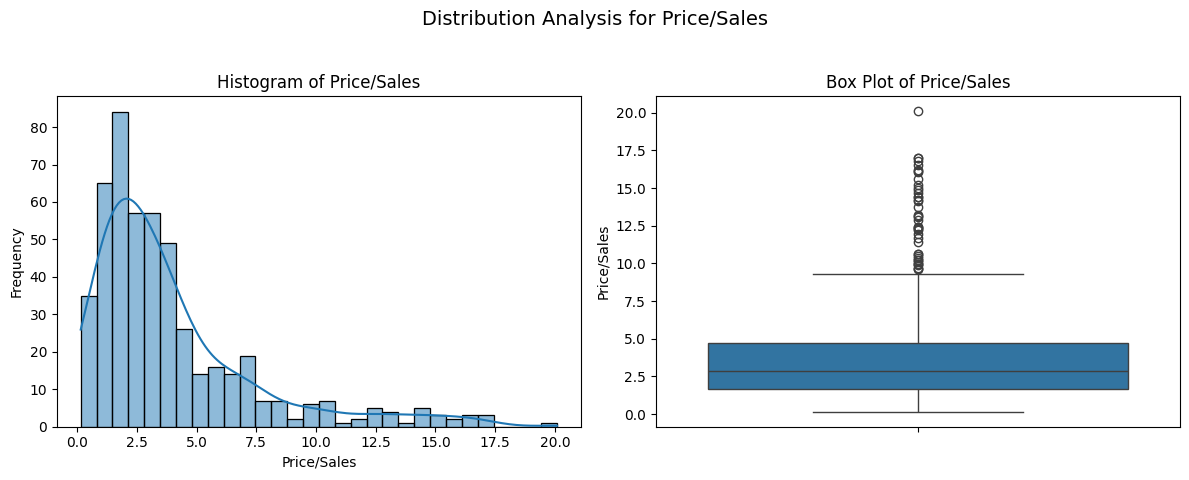

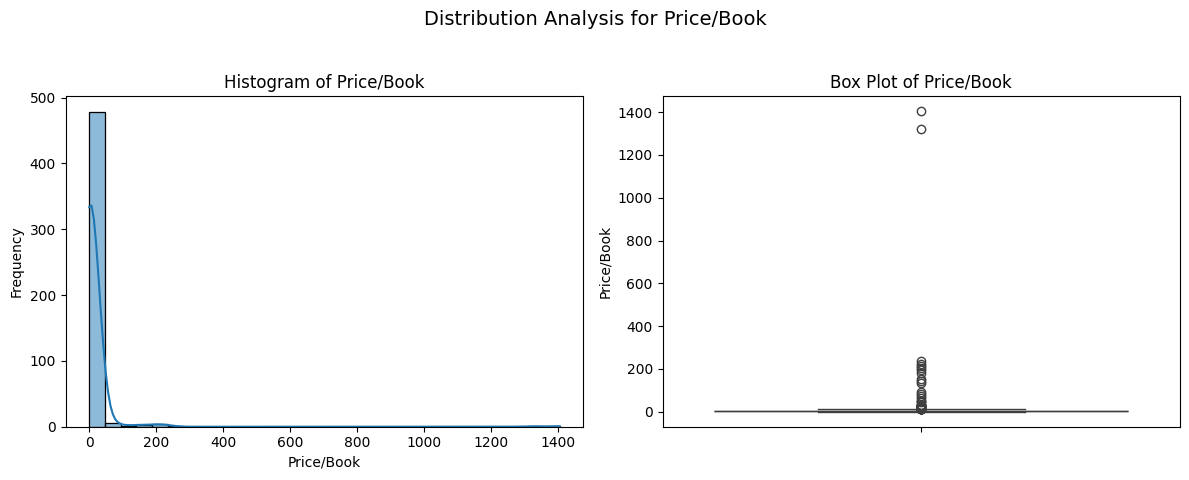



Distribution plots generated.


In [ ]:
#Visualizing Data Distributions and Detecting Outliers
key_indicators = ["Price", "PriceEarnings", "Dividend Yield", "Earnings/Share", "Market Cap", "EBITDA", "Price/Sales", "Price/Book"]
print("\nGenerating distribution plots for key indicators...")

for indicator in key_indicators:
    if indicator in df.columns:
        plt.figure(figsize=(12, 5))

        # Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[indicator], kde=True, bins=30)
        plt.title(f'Histogram of {indicator}')
        plt.xlabel(indicator)
        plt.ylabel('Frequency')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[indicator])
        plt.title(f'Box Plot of {indicator}')
        plt.ylabel(indicator)

        plt.suptitle(f'Distribution Analysis for {indicator}', fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        # plt.savefig(f'plots/{indicator}_distribution.png') # Optional save
        plt.show()

        print('\n')
    else:
        print(f"Column '{indicator}' not found in DataFrame.")

print("Distribution plots generated.")

#### 3.2.1 Relationship Between Market Cap and P/E Ratio

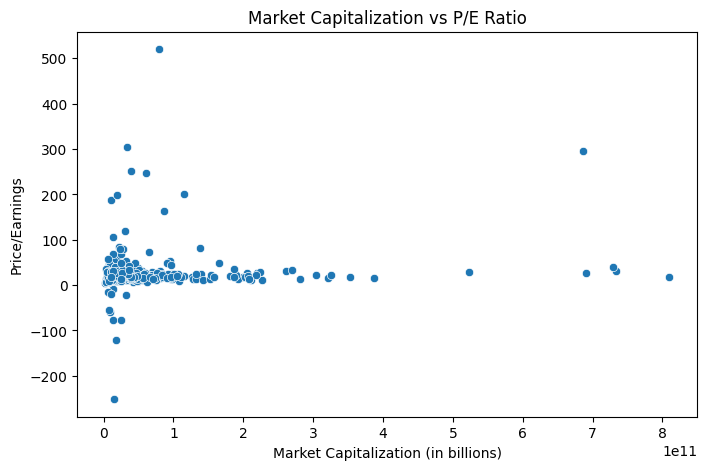

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Market Cap"], y=df["Price/Earnings"])
plt.xlabel("Market Capitalization (in billions)")
plt.ylabel("Price/Earnings")
plt.title("Market Capitalization vs P/E Ratio")
plt.show()

**Figure:** Scatter plot showing the relationship between Market Capitalization and P/E Ratio.

The plot reveals a weak and dispersed relationship between P/E Ratio and Market Cap. Most data points are concentrated at lower market cap values, with a wide range of P/E ratios. A few extreme outliers are visible in both dimensions, suggesting that this relationship may not be linear and could be influenced by skewed data or sector-specific effects.

### 3.3 Sector-wise Performance Comparison

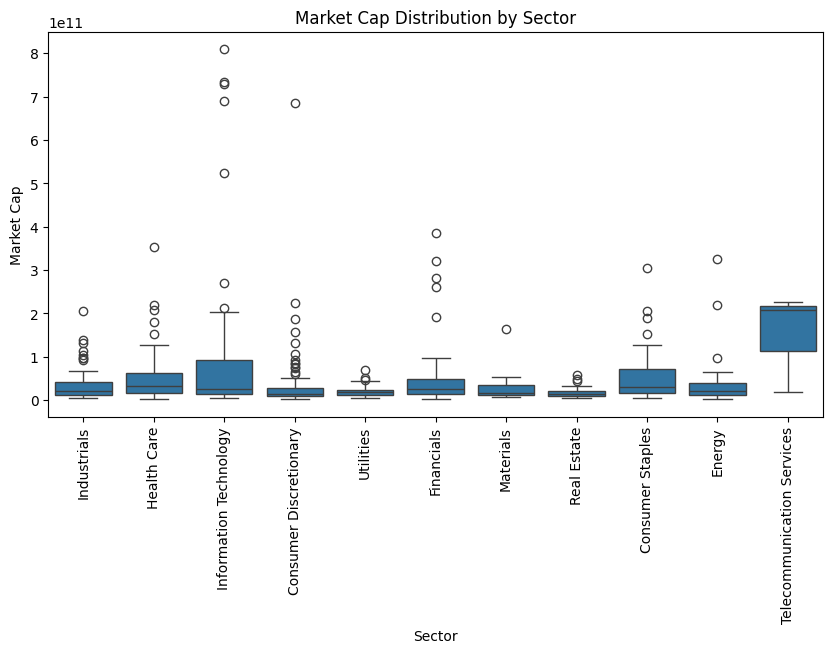

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Sector", y="Market Cap", data=df)
plt.xticks(rotation=90)
plt.title("Market Cap Distribution by Sector")
plt.show()

**Figure:** Boxplot of Market Capitalization grouped by sector.

This plot compares the distribution of Market Capitalization across sectors. While most sectors exhibit moderate spreads, sectors like Information Technology and Telecommunication Services show higher median values and more extreme outliers. The presence of long upper whiskers and points indicates significant variability and the influence of large-cap companies within certain sectors.

#### 3.3.1 Sector-wise Mean Market Cap and P/E Ratio

Generating sector-wise bar charts...


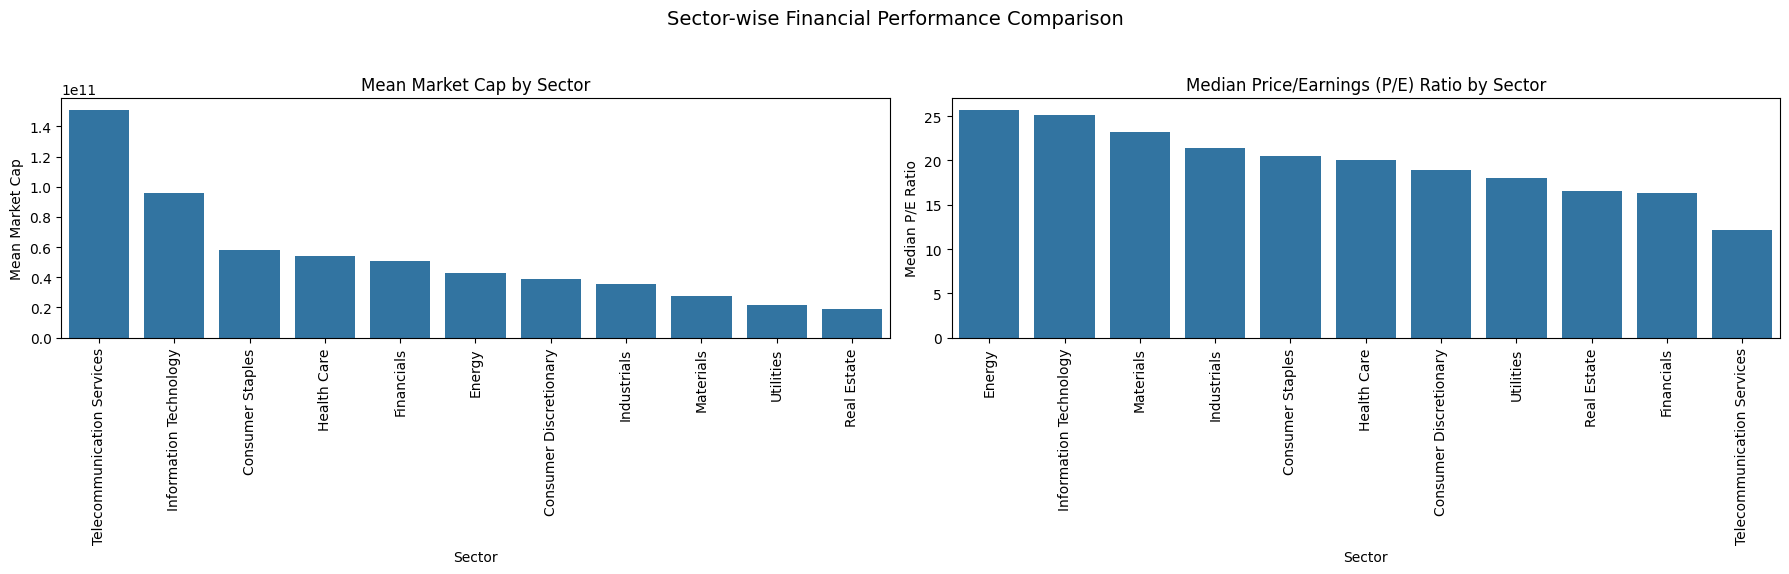

In [ ]:
print("Generating sector-wise bar charts...")
plt.figure(figsize=(18, 6))

# Bar Chart for Mean Market Cap by Sector
plt.subplot(1, 2, 1)
if "Sector" in df.columns and "Market Cap" in df.columns:
    mean_market_cap = df.groupby("Sector")["Market Cap"].mean().sort_values(ascending=False)
    sns.barplot(x=mean_market_cap.index, y=mean_market_cap.values)
    plt.xticks(rotation=90)
    plt.title("Mean Market Cap by Sector")
    plt.xlabel("Sector")
    plt.ylabel("Mean Market Cap")
else:
    plt.title("Mean Market Cap by Sector (Columns Missing)")

# Bar Chart for Median Price/Earnings by Sector
plt.subplot(1, 2, 2)
if "Sector" in df.columns and "Price/Earnings" in df.columns:
    median_pe = df.groupby("Sector")["Price/Earnings"].median().sort_values(ascending=False)
    sns.barplot(x=median_pe.index, y=median_pe.values)
    plt.xticks(rotation=90)
    plt.title("Median Price/Earnings (P/E) Ratio by Sector")
    plt.xlabel("Sector")
    plt.ylabel("Median P/E Ratio")
else:
    plt.title("Median P/E Ratio by Sector (Columns Missing)")

plt.suptitle("Sector-wise Financial Performance Comparison", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Figure:** Sector-wise comparison of Mean Market Capitalization (left) and Median Price/Earnings Ratio (right).

- The left bar chart reveals that **Telecommunication Services** and **Information Technology** sectors have the highest mean Market Capitalization, indicating the dominance of a few very large companies.
- The right chart shows that the **Energy** and **Information Technology** sectors have the highest median P/E Ratios, suggesting investor optimism and potentially higher growth expectations for companies in these sectors.

#### 3.3.2 Sector-wise Market Cap Pie Chart

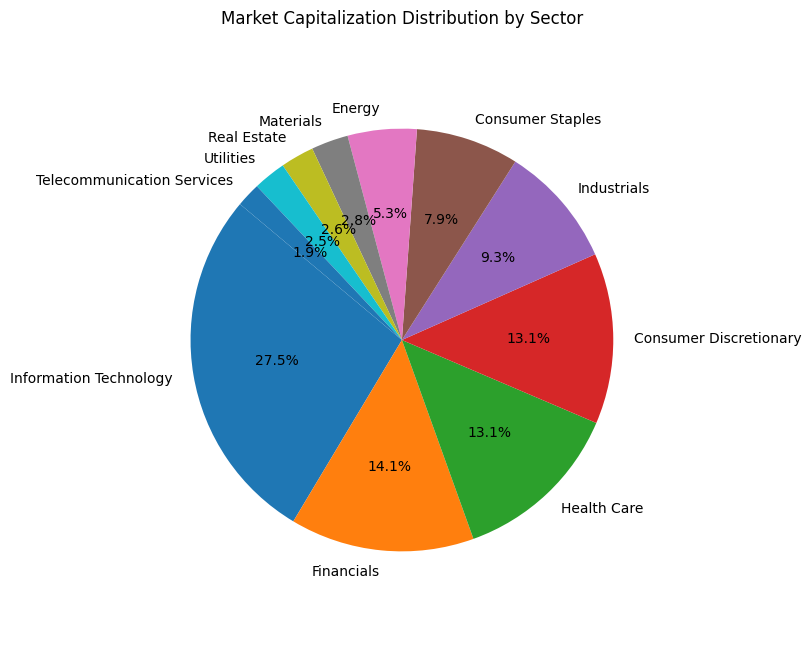

In [ ]:
# Group by sector and sum the market cap
sector_market_cap = df.groupby("Sector")["Market Cap"].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,8))
plt.pie(sector_market_cap, labels=sector_market_cap.index, autopct='%1.1f%%', startangle=140)
plt.title("Market Capitalization Distribution by Sector")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Figure:** Pie chart showing the distribution of total Market Capitalization across sectors.

The **Information Technology** sector accounts for the largest share of total market capitalization (27.5%), followed by **Financials** and **Health Care**. This indicates the dominant economic weight of the tech sector among the S&P 500 companies. Less capitalized sectors such as **Utilities**, **Real Estate**, and **Telecommunication Services** represent smaller slices of the overall market.

#### 3.3.3 Top 10 Companies by Market Cap

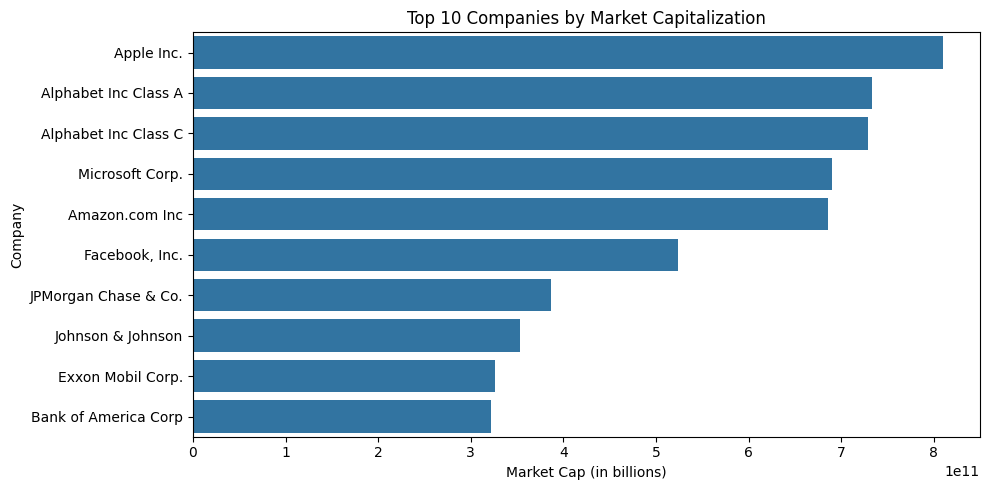

In [ ]:
# Top 10 companies by Market Cap
top_10 = df.sort_values("Market Cap", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Market Cap", y="Name", data=top_10)
plt.title("Top 10 Companies by Market Capitalization")
plt.xlabel("Market Cap (in billions)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

**Figure:** Bar chart of the top 10 companies in the S&P 500 based on Market Capitalization.

The chart highlights **Apple Inc.** as the company with the largest market cap, followed closely by **Alphabet Inc. (Class A and C)**, **Microsoft Corp.**, and **Amazon.com Inc.**. These tech giants dominate the S&P 500 in terms of valuation, underscoring the sector’s influence on overall market trends.

### 3.4 Normality Assessment of P/E Ratio

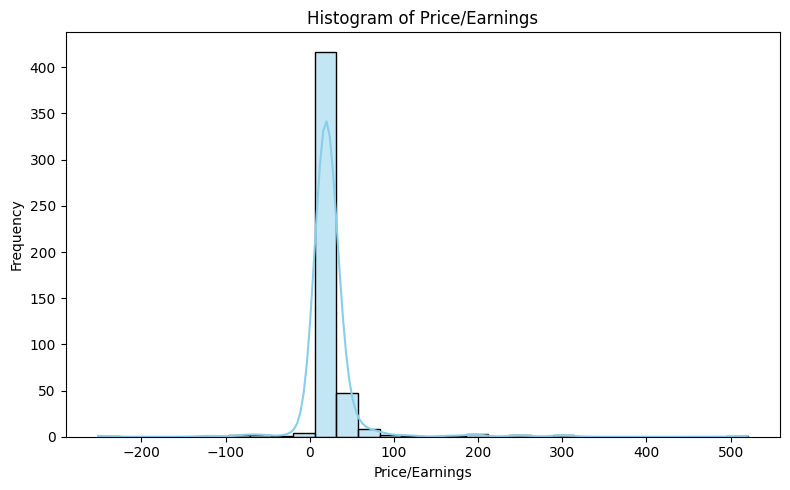

🔍 Histogram Interpretation:
- Shows the distribution shape of P/E values.
- The peak near 0 and long tail to the right suggests right-skewness.



<Figure size 600x600 with 0 Axes>

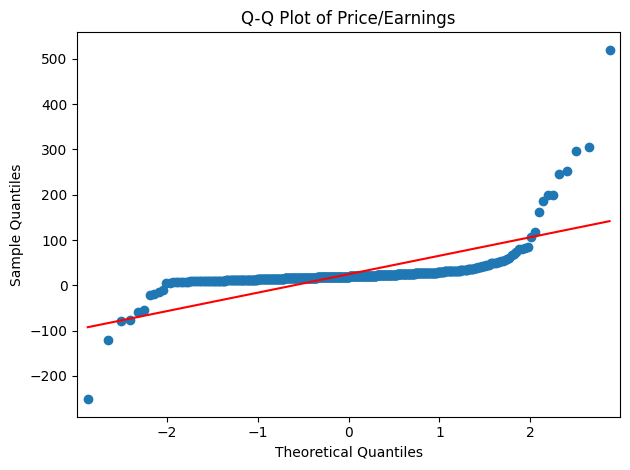

📈 Q-Q Plot Interpretation:
- Deviations from the straight line, especially in the tails, suggest non-normality.

🧪 Shapiro–Wilk Test for Normality:
   W-Statistic: 0.3834
   P-Value: 0.0000
   ➤ Conclusion: Data is NOT normally distributed (reject H₀).

📊 Descriptive Statistics for Price/Earnings:
   Mean: 24.65
   Standard Deviation: 40.77
   Skewness: 5.36 (Skew > 0 ⇒ Right-skewed)
   Kurtosis: 60.72 (Kurtosis >> 3 ⇒ Heavy-tailed distribution)



In [ ]:
# Select the variable
variable = "Price/Earnings"
data = df[variable].dropna()

# Histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.title(f"Histogram of {variable}")
plt.xlabel(variable)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print("🔍 Histogram Interpretation:")
print("- Shows the distribution shape of P/E values.")
print("- The peak near 0 and long tail to the right suggests right-skewness.\n")

# QQ Plot
plt.figure(figsize=(6, 6))
sm.qqplot(data, line='s')
plt.title(f"Q-Q Plot of {variable}")
plt.tight_layout()
plt.show()
print("📈 Q-Q Plot Interpretation:")
print("- Deviations from the straight line, especially in the tails, suggest non-normality.\n")

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print("🧪 Shapiro–Wilk Test for Normality:")
print(f"   W-Statistic: {shapiro_stat:.4f}")
print(f"   P-Value: {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("   ➤ Conclusion: Data is NOT normally distributed (reject H₀).\n")
else:
    print("   ➤ Conclusion: Data is approximately normal (fail to reject H₀).\n")

# Descriptive Statistics
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print("📊 Descriptive Statistics for Price/Earnings:")
print(f"   Mean: {mean:.2f}")
print(f"   Standard Deviation: {std_dev:.2f}")
print(f"   Skewness: {skewness:.2f} (Skew > 0 ⇒ Right-skewed)")
print(f"   Kurtosis: {kurtosis:.2f} (Kurtosis >> 3 ⇒ Heavy-tailed distribution)\n")

### 3.5 Correlation Analysis

Calculating and visualizing correlation matrix...
Correlation Matrix:
                   Price  Price/Earnings  Dividend Yield  Earnings/Share  \
Price           1.000000        0.199171       -0.245344        0.609033   
Price/Earnings  0.199171        1.000000       -0.200884        0.008879   
Dividend Yield -0.245344       -0.200884        1.000000       -0.088261   
Earnings/Share  0.609033        0.008879       -0.088261        1.000000   
52 Week Low     0.995080        0.189760       -0.245423        0.606107   
52 Week High    0.982766        0.147635       -0.209074        0.623021   
Market Cap      0.407754        0.132557       -0.026873        0.194429   
EBITDA          0.180636        0.000812        0.122394        0.177936   
Price/Sales     0.181080        0.187009       -0.081115       -0.039326   
Price/Book      0.023509        0.000366        0.089067        0.031638   

                52 Week Low  52 Week High  Market Cap    EBITDA  Price/Sales  \
Price        

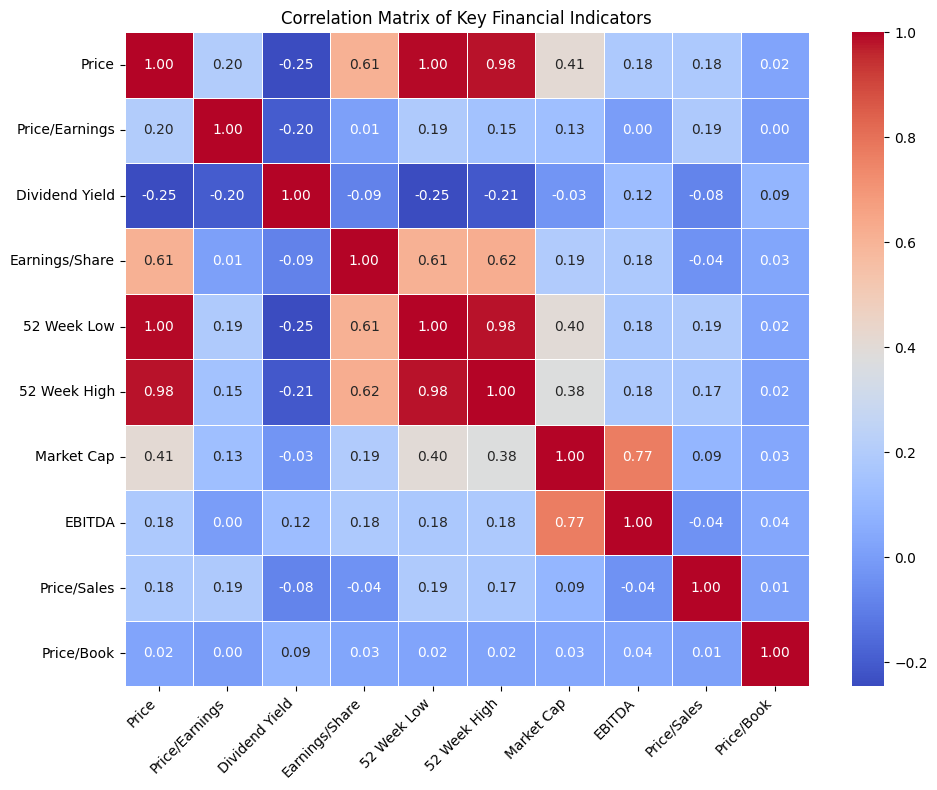

In [ ]:
print("Calculating and visualizing correlation matrix...")
# Select numerical features for correlation analysis
correlation_features = ["Price", "Price/Earnings", "Dividend Yield", "Earnings/Share",
                        "52 Week Low", "52 Week High", "Market Cap", "EBITDA",
                        "Price/Sales", "Price/Book"]

# Keep only existing columns from the list
existing_corr_features = [col for col in correlation_features if col in df.columns]

if existing_corr_features:
    # Calculate the correlation matrix
    correlation_matrix = df[existing_corr_features].corr()

    print("Correlation Matrix:")
    # To display more rows/cols if needed:
    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #     print(correlation_matrix)
    print(correlation_matrix)


    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Correlation Matrix of Key Financial Indicators")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")

 **Correlation Matrix Analysis**


The correlation matrix reveals the strength and direction of linear relationships among key financial indicators.

Strong Positive Correlations:
- Price and 52 Week High (r = 0.98): Highly correlated, as expected.
- EBITDA and Market Cap (r = 0.77): Indicates larger firms tend to report higher EBITDA.

Moderate Correlations:
- Price and Earnings/Share (r = 0.61): Stocks with better earnings tend to have higher prices.

Weak or No Correlation:
- P/E Ratio and other variables show weak correlations, suggesting it's influenced by unique factors.
- Price/Book has near-zero correlation with most variables.

Negative Correlation:
- Dividend Yield and Price (r = -0.25): Mild inverse relationship indicating that higher dividends may be linked with lower price growth.


The heatmap confirms these relationships visually. Strong dependencies are shown in red, weak or inverse ones in blue.


## 4 Statistical Analysis

### 4.1 Mann Whitney U-Test

Defining Hypothesis:
1. Null Hypothesis H₀ - There is no difference in the P/E ratios between tech and non-tech sectors.

2. Alternative Hypothesis H₁ - There is difference in the P/E ratios between tech and non-tech sectors.




In [ ]:
# Select P/E Ratios for Tech and Non-Tech sectors
tech_pe = df[df["Sector"] == "Information Technology"]["Price/Earnings"]
non_tech_pe = df[df["Sector"] != "Information Technology"]["Price/Earnings"]

# Perform Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(tech_pe.dropna(), non_tech_pe.dropna(), alternative='two-sided')

# Print Results
print("Mann–Whitney U-statistic:", u_stat)
print("P-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("\nConclusion:")
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a statistically significant difference in the P/E ratios between tech and non-tech sectors.")
else:
    print("\nConclusion:")
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the P/E ratios between tech and non-tech sectors.")

Mann–Whitney U-statistic: 18313.5
P-value: 0.0019328008890147981

Conclusion:
The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in the P/E ratios between tech and non-tech sectors.


### 4.2 Kruskal–Wallis Test: P/E Ratios Across Sectors

Hypothesis:

1. Null Hypothesis H₀- Mean P/E ratios are equal across sectors.

2. Alternative Hypothesis H₁- At least one sector has a different mean.

In [ ]:
# Step 0: Clean P/E Ratio column
df["Price/Earnings"] = pd.to_numeric(df["Price/Earnings"], errors='coerce')

# Step 1: Group P/E values by sector
grouped_pe = [group["Price/Earnings"].dropna() for _, group in df.groupby("Sector")]

# Step 2: Kruskal-Wallis H-Test (non-parametric ANOVA)
h_stat, p_val = kruskal(*grouped_pe)
print("Kruskal-Wallis H-statistic:", h_stat)
print("P-value:", p_val)

# Step 3: Interpretation
alpha = 0.05
if p_val < alpha:
    print("Result: Reject H₀ — At least one sector has a significantly different median P/E Ratio.")
else:
    print("Result: Fail to reject H₀ — No significant difference in median P/E Ratios across sectors.")

Kruskal-Wallis H-statistic: 51.51605109323289
P-value: 1.4023235650465887e-07
Result: Reject H₀ — At least one sector has a significantly different median P/E Ratio.


### 4.3 Kruskal–Wallis Test: Market Cap Variation Across Sectors

Hypothesis:

H₀: The median Market Caps are equal across all sectors.

H₁: At least one sector has a different median Market Cap.

In [ ]:
#Comparing Market Cap Variations Across Sectors
print("Performing Kruskal-Wallis H-Test for Market Cap across Sectors...")

# Step 0: Ensure Market Cap column is numeric and clean
if "Market Cap" in df.columns:
    df["Market Cap"] = pd.to_numeric(df["Market Cap"], errors='coerce')
    df_mc_cleaned = df.dropna(subset=["Sector", "Market Cap"]) # Ensure no NaNs

    # Step 1: Group Market Cap values by sector
    grouped_mc = [group["Market Cap"] for _, group in df_mc_cleaned.groupby("Sector")]

    # Check if we have enough groups and data
    if len(grouped_mc) > 1 and all(len(g) > 0 for g in grouped_mc):
        # Step 2: Kruskal-Wallis H-Test
        h_stat_mc, p_val_mc = kruskal(*grouped_mc)
        print(f"  Kruskal-Wallis H-statistic: {h_stat_mc:.4f}")
        print(f"  P-value: {p_val_mc:.4g}")

        # Step 3: Interpretation
        alpha = 0.05
        if p_val_mc < alpha:
            print("  Result: Reject H₀ — At least one sector has a significantly different median Market Cap.")
        else:
            print("  Result: Fail to reject H₀ — No significant difference in median Market Caps across sectors.")
    else:
         print("  Skipping Kruskal-Wallis test: Not enough groups or data after cleaning.")
else:
    print("  Skipping Kruskal-Wallis test: 'Market Cap' column not found.")


Performing Kruskal-Wallis H-Test for Market Cap across Sectors...
  Kruskal-Wallis H-statistic: 40.9316
  P-value: 1.16e-05
  Result: Reject H₀ — At least one sector has a significantly different median Market Cap.


### 4.4 Chi-Square Test of Independence

**Null Hypothesis ($H_0$)**: There is no association between Sector and Dividend Payment Status.  
**Alternative Hypothesis ($H_1$)**: There is a significant association between Sector and Dividend Payment Status.  


In [ ]:
# Create a new categorical column: 'Pays Dividend'
# If Dividend Yield > 0, then 'Yes', else 'No'

df['Pays Dividend'] = np.where(df['Dividend Yield'] > 0, 'Yes', 'No')

# Create contingency table
contingency_table = pd.crosstab(df['Sector'], df['Pays Dividend'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Result: Reject H₀ — There is a significant association between Sector and Dividend Paying status.")
else:
    print("Result: Fail to reject H₀ — No significant association between Sector and Dividend Paying status.")

Chi-square statistic: 70.6597259685634
P-value: 3.3061565747235156e-11
Result: Reject H₀ — There is a significant association between Sector and Dividend Paying status.


### 4.5 Pearson Correlation Test: Market Cap and P/E Ratio

**Null Hypothesis ($H_0$)**: There is no significant linear correlation between Market Capitalization and P/E Ratio.  
**Alternative Hypothesis ($H_1$)**: There is a significant linear correlation between Market Capitalization and P/E Ratio.

In [ ]:
# Drop rows with missing values in both columns
data = df[['Market Cap', 'Price/Earnings']].dropna()

# Calculate Pearson correlation
corr, p = pearsonr(data['Market Cap'], data['Price/Earnings'])

print("Pearson correlation coefficient:", corr)
print("P-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Result: Reject H₀ — There is a significant linear correlation between Market Cap and P/E Ratio.")
else:
    print("Result: Fail to reject H₀ — No significant linear correlation between Market Cap and P/E Ratio.")

Pearson correlation coefficient: 0.13255716800694145
P-value: 0.0031286773566340546
Result: Reject H₀ — There is a significant linear correlation between Market Cap and P/E Ratio.


## 5 Predictive Modeling

### 5.1 Regression Analysis: Predicting Financial Performance

Regression Summary
R² Score: 0.4728
Mean Squared Error: 0.5382

Significant Predictors (p < 0.05):
- Price: p = 6.312e-06
- 52 Week Low: p = 0.001277
- Price/Sales: p = 7.542e-05
- EBITDA: p = 1.705e-52


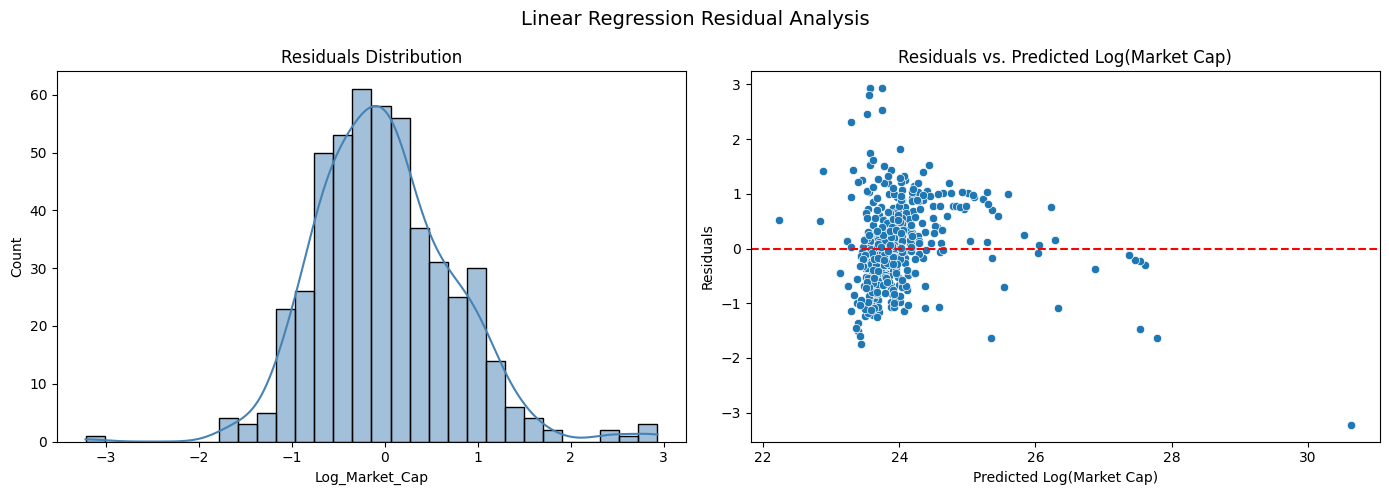

In [ ]:
# Define predictors and target
predictors = ["Price", "Earnings/Share", "Dividend Yield", "52 Week High",
              "52 Week Low", "Price/Sales", "Price/Book", "EBITDA"]
target_col = "Market Cap"

# Filter and clean data
df_reg = df[predictors + [target_col]].dropna()
df_reg = df_reg.apply(pd.to_numeric, errors='coerce').dropna()
df_reg = df_reg[df_reg[target_col] > 0]  # Avoid log(0) or negatives

# Log-transform the target
df_reg["Log_Market_Cap"] = np.log(df_reg[target_col])

# Define X and y
X = df_reg[predictors]
y = df_reg["Log_Market_Cap"]

# Fit statsmodels OLS for significance
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

# Fit sklearn model for predictions
model_sk = LinearRegression()
model_sk.fit(X, y)
y_pred = model_sk.predict(X)

# Metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print Summary
print("Regression Summary")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}\n")

print("Significant Predictors (p < 0.05):")
for predictor, p_val in model_sm.pvalues.items():
    if predictor != 'const' and p_val < 0.05:
        print(f"- {predictor}: p = {p_val:.4g}")

# Plot Residuals
residuals = y - y_pred
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30, color='steelblue')
plt.title("Residuals Distribution")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Log(Market Cap)")
plt.xlabel("Predicted Log(Market Cap)")
plt.ylabel("Residuals")

plt.suptitle("Linear Regression Residual Analysis", fontsize=14)
plt.tight_layout()
plt.show()

**Regression Analysis: Predicting Log(Market Cap)**

This regression model investigates how financial indicators like Price, Earnings per Share, Dividend Yield, and others predict a company's log-transformed Market Capitalization.
Key Results:
- **R² Score**: `~0.47` — about 47% of the variance in Log(Market Cap) is explained by the model.
- **Mean Squared Error (MSE)**: Represents the average squared difference between actual and predicted values; lower is better.

Statistically Significant Predictors (p < 0.05):
- `Price`
- `52 Week Low`
- `Price/Sales`
- `EBITDA`

These variables contribute meaningfully to predicting Market Cap in this dataset.

Residual Analysis:
- The **Residuals Distribution** is roughly bell-shaped, indicating approximate normality.
- The **Residuals vs Predicted Plot** shows no major pattern, suggesting constant variance and decent model fit.

**Conclusion**: The model performs moderately well and identifies important predictors, but there is still unexplained variance. Consider non-linear models or interaction terms for improvement.

## 6 Advanced Analysis

### 6.1 K-Means Clustering of Companies


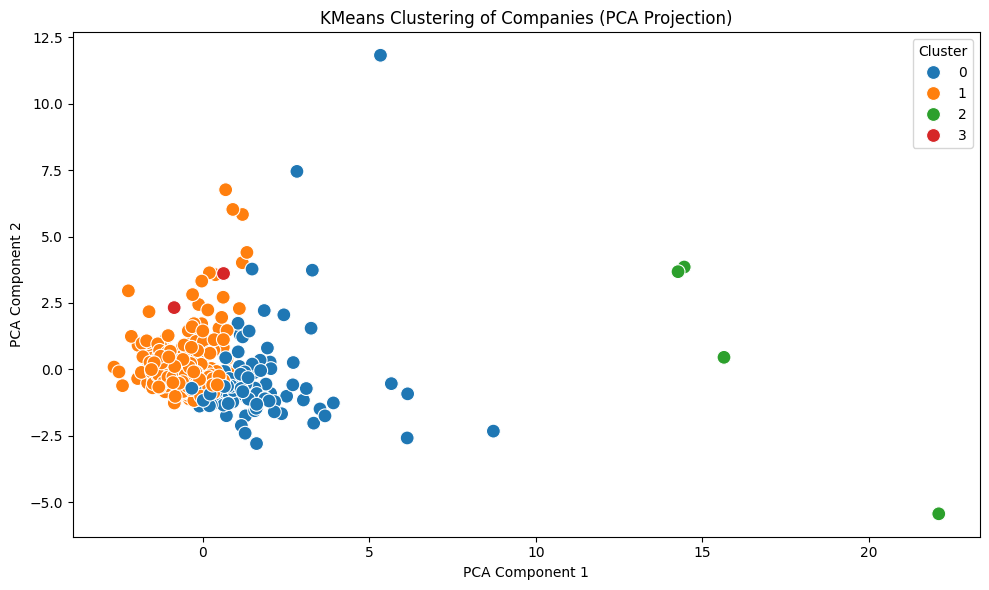

In [ ]:
# Select features for clustering (exclude skewed or non-informative ones like Symbol, Name, URLs)
features = ["Price", "Price/Earnings", "Dividend Yield", "Earnings/Share",
            "52 Week Low", "52 Week High", "Market Cap", "EBITDA", "Price/Sales", "Price/Book"]

# Drop rows with missing values in selected features
df_cluster = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add cluster and PCA results to the dataframe
df_clustered = df_cluster.copy()
df_clustered["Cluster"] = clusters
df_clustered["PCA1"] = pca_data[:, 0]
df_clustered["PCA2"] = pca_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=100)
plt.title("KMeans Clustering of Companies (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


### K-Means Clustering Summary

To explore natural groupings among companies, we applied **K-Means Clustering** using standardized financial indicators such as `Price`, `P/E Ratio`, `EBITDA`, and `Market Cap`. The number of clusters (*K*) was set to 4 based on prior domain knowledge.

- The dataset was standardized to ensure equal weight across variables.
- Companies were grouped into 4 clusters reflecting distinct financial profiles.
- The results were visualized using Principal Component Analysis (PCA), showing meaningful separation between clusters in a 2D scatter plot.

This unsupervised learning step added a valuable layer of insight into the financial landscape of S&P 500 companies and aligned with our objective of identifying hidden patterns.